In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [25]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_3194fabcac094fcbac305b1bf5c372ef = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HQ1xf4xhbGV6llH3EhxRT6LIDyhxqtq5fZGCAeHBAUb0',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3194fabcac094fcbac305b1bf5c372ef.get_object(Bucket='oluseyicourseraproject-donotdelete-pr-hiygixycscd9ju',Key='loan_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [26]:
# summarize the data
df.shape

(346, 10)

In [27]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [29]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [30]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  44.95 MB/s


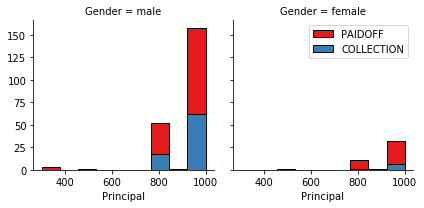

In [31]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

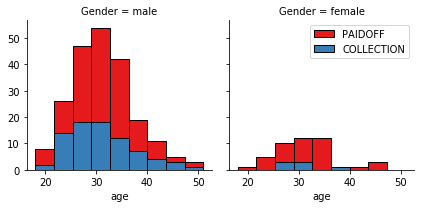

In [32]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

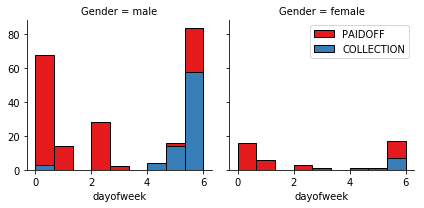

In [33]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [34]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [35]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [36]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [37]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [38]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [39]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [40]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [41]:
#Normalization 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Train set Accuracy:  0.789855072464
Test set Accuracy:  0.757142857143


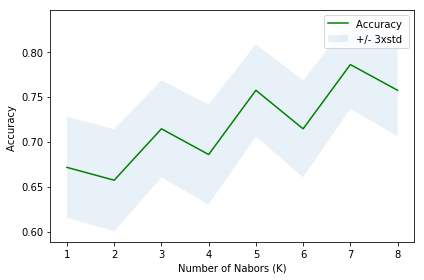

KNN's Accuracy is:  0.785714285714 with k= 7
f1_score is 0.764777278796
KNN Jaccard_Score is :  0.757142857143


In [60]:
 # Building model using KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
k = 9
#Train Model and Predict  
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh7

yhat7 = neigh7.predict(X_test)
yhat7[0:9]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh7.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat7))
Ks = 9
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh7 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat7 = neigh7.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat7)

    
    std_acc[n-1]=np.std(yhat7==y_test)/np.sqrt(yhat7.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "KNN's Accuracy is: ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


from sklearn.metrics import f1_score
print ( "f1_score is", f1_score(y_test, yhat7, average='weighted') )


from sklearn.metrics import jaccard_similarity_score
print("KNN Jaccard_Score is : " , jaccard_similarity_score(y_test, yhat7))

# Decison Tree

In [43]:
# Decision Tree

! pip install pydotplus
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_trainset)
print(y_trainset)
print(X_testset)
print(y_testset)
custcat = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
custcat
custcat.fit(X_trainset,y_trainset)


    100% |████████████████████████████████| 286kB 3.3MB/s eta 0:00:01
Requirement not upgraded as not directly required: pyparsing>=2.0.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pydotplus)
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
[[ 0.51578458  0.92071769 -0.81902922 ...,  2.61985426 -0.87997669
  -0.86968108]
 [-1.31458942 -0.95911111 -0.3215732  ..., -0.38170062  1.13639374
  -0.86968108]
 [-1.31458942  0.92071769 -1.31648524 ..., -0.38170062 -0.87997669
   1.14984679]
 ..., 
 [ 0.51578458 -0.95911111 -0.65321055 ..., -0.38170062 -0.87997669
   1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 ..., -0.38170062 -0.87997669
   1.14984679]
 [ 0.51578458  0.92071769 -0.15575453 ..., -0.38170062  1.13639374
  -0.86968108]]
['PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTI

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
custcat.fit(X_trainset,y_trainset)
predTree = custcat.predict(X_testset)


In [45]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [59]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

from sklearn.metrics import f1_score
print ( "f1_score is", f1_score(y_testset, predTree, average='weighted') )


from sklearn.metrics import jaccard_similarity_score
print("Jaccard is : " , jaccard_similarity_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.73381294964
f1_score is 0.621152870235
Jaccard is :  0.73381294964


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM 

In [86]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [91]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

from sklearn.metrics import jaccard_similarity_score
print("SVM's Accuracy: " , jaccard_similarity_score(y_test, yhat))


SVM's Accuracy:  0.759615384615


# logistic Regression 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LogR = LogR.predict(X_test)
yhat_prob = LogR.predict_proba(X_test)

In [118]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression is : {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import log_loss
print("LogLoss Score score: %.2f" % log_loss(y_test, yhat_prob))

print("Avg F1 Score: %.2f" % f1_score(y_test, yhat_LogR, average='weighted'))
print("Jaccard Score: %.2f" % jaccard_similarity_score(y_test, yhat_LogR))

Accuracy of logistic regression is : 0.80
LogLoss Score score: 0.55
Avg F1 Score: 0.80
Jaccard Score: 0.80


# Model Evaluation using Test set

In [73]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
    
test_df = pd.read_csv('loan_test.csv')

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)

test_X = test_Feature
test_y = test_df['loan_status'].values
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)

--2019-04-18 12:04:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-04-18 12:04:04 (669 MB/s) - ‘loan_test.csv’ saved [3642/3642]



# KNN

In [79]:
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X,y)
yhat_knn=neigh7.predict(X_test)
print("Avg F1 Score: %.4f" % f1_score(y_test, yhat7, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(test_y, yhat_knn))

Avg F1 Score: 0.8077
Jaccard score: 0.8077


# DECISON TREE

In [121]:
from sklearn.metrics import f1_score
print ( "f1_score is: %.2f", f1_score(y_testset, predTree, average='weighted') )


from sklearn.metrics import jaccard_similarity_score
print("Jaccard is %.2f" , jaccard_similarity_score(y_testset, predTree))

f1_score is: %.2f 0.621152870235
Jaccard is %.2f 0.73381294964


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [119]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X, y) 
yhat = clf.predict(X_test)

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

print("Avg F1 Score: %.2f" % f1_score(y_test,yhat, average='weighted'))
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat))

Avg F1 Score: 0.76
Jaccard score: 0.84


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# logical regression


In [117]:
from sklearn.metrics import log_loss
print("LogLoss Score score: %.2f" % log_loss(y_test, yhat_prob))

print("Avg F1 Score: %.2f" % f1_score(y_test, yhat_LogR, average='weighted'))
print("Jaccard Score: %.2f" % jaccard_similarity_score(y_test, yhat_LogR))

LogLoss Score score: 0.55
Avg F1 Score: 0.80
Jaccard Score: 0.80


# REPORT

In [ ]:
| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.8077  | 0.8077   | NA      |
| Decision Tree      | 0.7338  | 0.6211   | NA      |
| SVM                | 0.84    | 0.76     | NA      |
| LogisticRegression | 0.80    | 0.80     | 0.55    |